In [72]:
# loading pkg
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

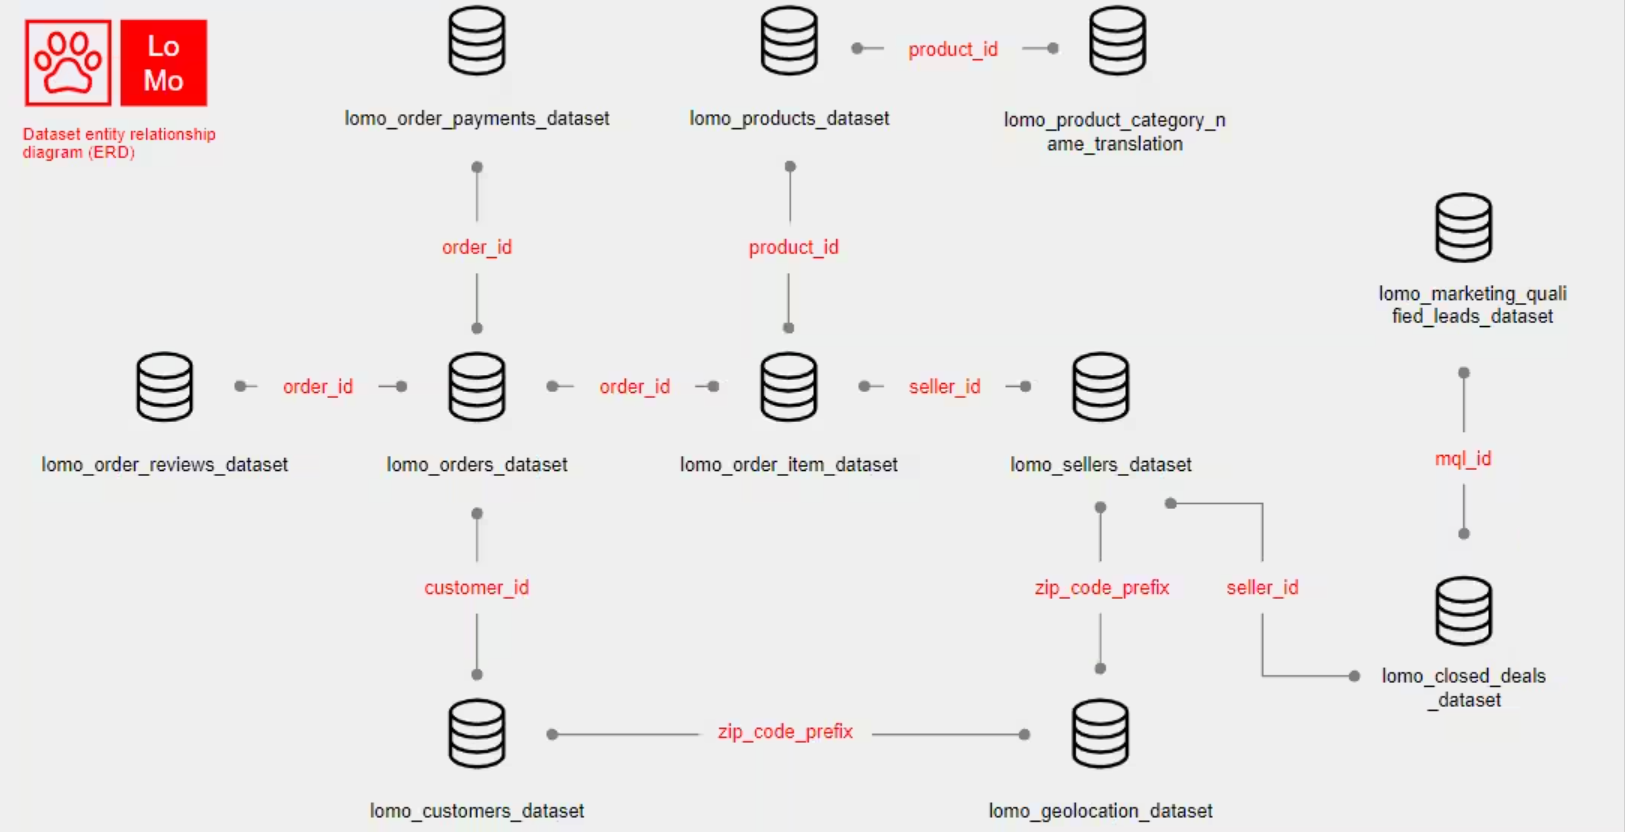

In [73]:
# getting the data
file_pattern="../data/*.csv"
file_paths=glob.glob(file_pattern)
dfs=[]

for file_path in file_paths:
    df=pd.read_csv(file_path)
    dfs.append(df)

In [74]:
lomo_customer_df=dfs[0]
lomo_sellers_df=dfs[1]
lomo_geolocation_df=dfs[2]
lomo_products_df=dfs[3]
lomo_product_category_name_translation=dfs[4]
lomo_orders_df=dfs[5]
lomo_order_items_df=dfs[6]
lomo_order_payments_df=dfs[7]
lomo_order_reviews_df=dfs[8]
lomo_marketing_qualified_leads_df=dfs[9]
lomo_closed_deals_df=dfs[10]

lomo_customer_df cleaning

In [75]:
lomo_customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,8535e7d171732dcdb3de48ff99040f6c,05c0c68fbdf283e56b37df9f2d20245c,TH100101,Phra Nakhon,Bangkok
1,045ce65dc053765839733057c287dbcb,1f69219bc86e6918b4751692323de642,TH100101,Phra Nakhon,Bangkok
2,c754052065714c0e304de22a0e5b7749,31b5e7b0290cf70ac603e77f85efb53f,TH100101,Phra Nakhon,Bangkok
3,d707092bd024342cd484143f8fd20a55,3f6faa55fa7e82f1245fff7e2118663b,TH100101,Phra Nakhon,Bangkok
4,6a899e55865de6549a58d2c6845e5604,3fb97204945ca0c01bcf3eee6031c5f1,TH100101,Phra Nakhon,Bangkok


lomo_sellers_df cleaning

In [78]:
lomo_sellers_df.head()

,seller_id,seller_zip_code_prefix_prep,seller_city_prep,seller_state_prep,seller_zip_code_prefix,seller_city,seller_state
0,c2bda99904207edd1834f03e0022b007,TH100101,Phra Nakhon,Bangkok,TH100101,Phra Nakhon,Bangkok
1,788e857f317e53de488d393e65a80f45,TH100101,Phra Nakhon,Bangkok,TH100101,Phra Nakhon,Bangkok
2,713e3a23ca5e47786eb6f0d99f94cfac,TH100102,Phra Nakhon,Bangkok,TH100102,Phra Nakhon,Bangkok
3,cc80e2f693fa6e2408f47ccf62413fc1,TH100102,Phra Nakhon,Bangkok,TH100102,Phra Nakhon,Bangkok
4,a425f92c199eb576938df686728acd20,TH100102,Phra Nakhon,Bangkok,TH100102,Phra Nakhon,Bangkok


**What is seller_state_prep and seller_city_prep?**

lomo_geolocation_df cleaning

In [79]:
lomo_geolocation_df.head()

,object_id,shape,admin0_name_en,admin0_name_th,admin0_pcode,admin1_name_en,admin1_name_th,admin1_pcode,admin2_name_en,admin2_name_th,admin2_pcode,admin3_name_en,admin3_name_th,admin3_pcode,shape_length,shape_area
0,1,Polygon,Thailand,ประเทศไทย,TH,Loei,เลย,TH42,Tha Li,ท่าลี่,TH4208,A Hi,อาฮี,TH420803,0.360041,0.005078
1,2,Polygon,Thailand,ประเทศไทย,TH,Pattani,ปัตตานี,TH94,Mueang Pattani,เมืองปัตตานี,TH9401,A Noru,อาเนาะรู,TH940102,0.044900,0.000120
2,3,Polygon,Thailand,ประเทศไทย,TH,Surin,สุรินทร์,TH32,Buachet,บัวเชด,TH3213,A Phon,อาโพน,TH321305,0.365838,0.004086
3,4,Polygon,Thailand,ประเทศไทย,TH,Yala,ยะลา,TH95,Raman,รามัน,TH9506,A Song,อาซ่อง,TH950615,0.314589,0.003177
4,5,Polygon,Thailand,ประเทศไทย,TH,Nan,น่าน,TH55,Wiang Sa,เวียงสา,TH5507,Ai Na Lai,อ่ายนาไลย,TH550711,1.102764,0.014955


In [80]:
# Drop the columns with Thai values and redundant pcodes
columns_to_drop = ['admin0_name_th', 'admin1_name_th', 'admin2_name_th', 'admin3_name_th','admin0_pcode','admin1_pcode','admin2_pcode']
lomo_geolocation_df = lomo_geolocation_df.drop(columns=columns_to_drop)

# Concatenate the English name columns into one column
lomo_geolocation_df['location'] = lomo_geolocation_df['admin0_name_en'] + ', ' + \
                                          lomo_geolocation_df['admin1_name_en'] + ', ' + \
                                          lomo_geolocation_df['admin2_name_en'] + ', ' + \
                                          lomo_geolocation_df['admin3_name_en']

# Drop the individual name columns
columns_to_drop = ['admin0_name_en', 'admin1_name_en', 'admin2_name_en', 'admin3_name_en']
lomo_geolocation_df = lomo_geolocation_df.drop(columns=columns_to_drop)


In [81]:
# edited dataset
lomo_geolocation_df.head()

,object_id,shape,admin3_pcode,shape_length,shape_area,location
0,1,Polygon,TH420803,0.360041,0.005078,"Thailand, Loei, Tha Li, A Hi"
1,2,Polygon,TH940102,0.044900,0.000120,"Thailand, Pattani, Mueang Pattani, A Noru"
2,3,Polygon,TH321305,0.365838,0.004086,"Thailand, Surin, Buachet, A Phon"
3,4,Polygon,TH950615,0.314589,0.003177,"Thailand, Yala, Raman, A Song"
4,5,Polygon,TH550711,1.102764,0.014955,"Thailand, Nan, Wiang Sa, Ai Na Lai"


In [82]:
lomo_geolocation_df.isna().sum()

object_id       0
shape           0
admin3_pcode    0
shape_length    0
shape_area      0
location        0
dtype: int64

lomo_products_df cleaning

In [83]:
lomo_products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


In [84]:
# Rename the columns with spelling issues
lomo_products_df = lomo_products_df.rename(columns={'product_name_lenght': 'product_name_length',
                                                    'product_description_lenght': 'product_description_length'})

In [85]:
# dataset with correct spelling
lomo_products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


In [86]:
lomo_products_df["product_category_name"].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [87]:
lomo_products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [88]:
# Merge the two DataFrames on the common column 'product_category_name'
merged_df = lomo_products_df.merge(
    lomo_product_category_name_translation,
    left_on='product_category_name',
    right_on='product_category_name_portugese',
    how='left'  # Use 'left' to preserve all rows from lomo_products_df
)

# Drop the redundant columns
merged_df = merged_df.drop(columns=['product_category_name', 'product_category_name_portugese'])

# Rename the new column to 'product_category_name'
merged_df = merged_df.rename(columns={'product_category_name_english': 'product_category_name'})

In [89]:
merged_df.head()

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40,287,1,225,16,10,14,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44,276,1,1000,30,18,20,arts
2,96bd76ec8810374ed1b65e291975717f,46,250,1,154,18,9,15,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27,261,1,371,26,4,26,baby
4,9dc1a7de274444849c219cff195d0b71,37,402,4,625,20,17,13,housewares


In [90]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Create a function to find the best match for each category name
def find_best_match(row, choices):
    best_match, score = process.extractOne(row['product_category_name'], choices, scorer=fuzz.token_sort_ratio)
    return pd.Series({'best_match_category': best_match, 'match_score': score})

# Create a list of unique English category names
english_categories = lomo_product_category_name_translation['product_category_name_english'].unique()

# Apply the fuzzy matching to find the best match for each category name
lomo_products_df[['best_match_category', 'match_score']] = lomo_products_df.apply(lambda row: find_best_match(row, english_categories), axis=1)

# Merge the two DataFrames on the best_match_category
merged_df = lomo_products_df.merge(
    lomo_product_category_name_translation,
    left_on='best_match_category',
    right_on='product_category_name_english',
    how='left'  # Use 'left' to preserve all rows from lomo_products_df
)

# Drop the redundant columns
merged_df = merged_df.drop(columns=['product_category_name', 'best_match_category', 'match_score'])

# Rename the new column to 'product_category_name'
merged_df = merged_df.rename(columns={'product_category_name_english': 'product_category_name'})

# The 'merged_df' DataFrame now contains the 'product_category_name' with mapped values


In [91]:
merged_df.isna().sum()

product_id                         0
product_name_length                0
product_description_length         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
product_category_name_portugese    0
product_category_name              0
dtype: int64

In [92]:
merged_df.head()

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_portugese,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40,287,1,225,16,10,14,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44,276,1,1000,30,18,20,artes,arts
2,96bd76ec8810374ed1b65e291975717f,46,250,1,154,18,9,15,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27,261,1,371,26,4,26,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,37,402,4,625,20,17,13,cds_dvds_musicais,cds_dvds_musicals


In [93]:
lomo_products_df=merged_df.drop(columns=["product_category_name_portugese"])

In [94]:
lomo_products_df.head()

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40,287,1,225,16,10,14,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44,276,1,1000,30,18,20,arts
2,96bd76ec8810374ed1b65e291975717f,46,250,1,154,18,9,15,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27,261,1,371,26,4,26,baby
4,9dc1a7de274444849c219cff195d0b71,37,402,4,625,20,17,13,cds_dvds_musicals


lomo_orders_df cleaning

In [95]:
lomo_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2017 10:56,02/10/2017 11:07,04/10/2017 19:55,10/10/2017 21:25,18/10/2017 00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24/07/2018 20:41,26/07/2018 03:24,26/07/2018 14:31,07/08/2018 15:27,13/08/2018 00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08/08/2018 08:38,08/08/2018 08:55,08/08/2018 13:50,17/08/2018 18:06,04/09/2018 00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 00:28,15/12/2017 00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,13/02/2018 21:18,13/02/2018 22:20,14/02/2018 19:46,16/02/2018 18:17,26/02/2018 00:00


In [96]:
lomo_orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [97]:
lomo_orders_df=lomo_orders_df.drop(columns=["order_approved_at","order_delivered_carrier_date","order_delivered_customer_date"])

In [98]:
lomo_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2017 10:56,18/10/2017 00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24/07/2018 20:41,13/08/2018 00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08/08/2018 08:38,04/09/2018 00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,15/12/2017 00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,13/02/2018 21:18,26/02/2018 00:00


lomo_order_items_df cleaning

In [99]:
lomo_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.90,18.14


In [100]:
lomo_order_items_df["freight_value"].value_counts()

freight_value
15.10    3707
7.78     2262
14.10    1875
11.85    1846
18.23    1575
         ... 
57.83       1
80.47       1
70.92       1
42.85       1
6.37        1
Name: count, Length: 6999, dtype: int64

lomo_order_payments_df cleaning

In [101]:
lomo_order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [102]:
lomo_order_payments_df["payment_sequential"].value_counts()

payment_sequential
1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: count, dtype: int64

lomo_order_reviews_df cleaning

In [103]:
lomo_order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/01/2018 00:00,18/01/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10/03/2018 00:00,11/03/2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17/02/2018 00:00,18/02/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,21/04/2017 00:00,21/04/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,ParabÃ©ns lojas lannister adorei comprar pela ...,01/03/2018 00:00,02/03/2018 10:26


In [104]:
lomo_order_reviews_df["review_comment_title"].value_counts()

review_comment_title
Recomendo          426
recomendo          346
Bom                294
super recomendo    271
Excelente          248
                  ... 
Atraso Entrega       1
Top Show             1
Foi cancelado        1
 Muito bom!          1
Foto enganosa        1
Name: count, Length: 4588, dtype: int64

In [105]:
lomo_order_reviews_df=lomo_order_reviews_df.drop(columns=["review_comment_title",
                                                          "review_comment_message"])

In [106]:
lomo_order_reviews_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,18/01/2018 00:00,18/01/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,10/03/2018 00:00,11/03/2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,17/02/2018 00:00,18/02/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,21/04/2017 00:00,21/04/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,01/03/2018 00:00,02/03/2018 10:26


lomo_marketing_qualified_leads_df cleaning

In [107]:
lomo_marketing_qualified_leads_df.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,01/02/2018,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,20/10/2017,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,22/03/2018,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,22/01/2018,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,21/02/2018,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [108]:
lomo_marketing_qualified_leads_df.isna().sum()

mql_id                0
first_contact_date    0
landing_page_id       0
origin                0
dtype: int64

In [115]:
lomo_marketing_qualified_leads_df["origin"].value_counts()

origin
organic_search       2296
paid_search          1586
social               1350
unknown              1159
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: count, dtype: int64

In [110]:
lomo_closed_deals_df.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,average_stock,business_type_org,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,26/02/2018 19:58,pet,online_medium,captain_america,False,above 100,reseller,400,"3,000"
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,08/05/2018 20:17,car_accessories,industry,hawkeye,True,above 100,reseller,600,"6,000"
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,05/06/2018 17:27,home_appliances,online_big,captain_america,False,above 100,reseller,700,"4,000"
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,17/01/2018 13:51,food_drink,online_small,scarlet_witch,True,above 100,reseller,700,"2,000"
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,03/07/2018 20:17,home_appliances,industry,iron_man,False,below 100,manufacturer,300,"3,000"


In [111]:
columns_to_drop=["lead_behaviour_profile",
                 "has_company",
                 "average_stock",
                 "declared_product_catalog_size",
                 "declared_monthly_revenue"]
lomo_closed_deals_df=lomo_closed_deals_df.drop(columns=columns_to_drop)

In [112]:
lomo_closed_deals_df.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,business_type_org
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,26/02/2018 19:58,pet,online_medium,reseller
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,08/05/2018 20:17,car_accessories,industry,reseller
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,05/06/2018 17:27,home_appliances,online_big,reseller
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,17/01/2018 13:51,food_drink,online_small,reseller
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,03/07/2018 20:17,home_appliances,industry,manufacturer


Saving the cleaned data in a separate folder

In [113]:
import os

# Define the directory path for saving the CSV files
output_directory = '../cleaned data'

# Dictionary of DataFrames to save (excluding 'lomo_product_category_name_translation')
dataframes_to_save = {
    'lomo_customer_df': lomo_customer_df,
    'lomo_sellers_df': lomo_sellers_df,
    'lomo_geolocation_df': lomo_geolocation_df,
    'lomo_products_df': lomo_products_df,
    'lomo_orders_df': lomo_orders_df,
    'lomo_order_items_df': lomo_order_items_df,
    'lomo_order_payments_df': lomo_order_payments_df,
    'lomo_order_reviews_df': lomo_order_reviews_df,
    'lomo_marketing_qualified_leads_df': lomo_marketing_qualified_leads_df,
    'lomo_closed_deals_df': lomo_closed_deals_df
}

# Save each DataFrame as a separate CSV file
for file_name, df in dataframes_to_save.items():
    output_path = os.path.join(output_directory, f"{file_name}.csv")
    df.to_csv(output_path, index=False)